In [1]:
from openai import OpenAI
import base64
import json
from pathlib import Path
import os
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO
import json
from pydantic import BaseModel
import pprint as pp


In [2]:
# Function to open image file, resize to 512x512, and encode to base64


def encode_image(image_path):
    image = Image.open(image_path)
    # image = image.resize((512, 512))
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return img_str
    

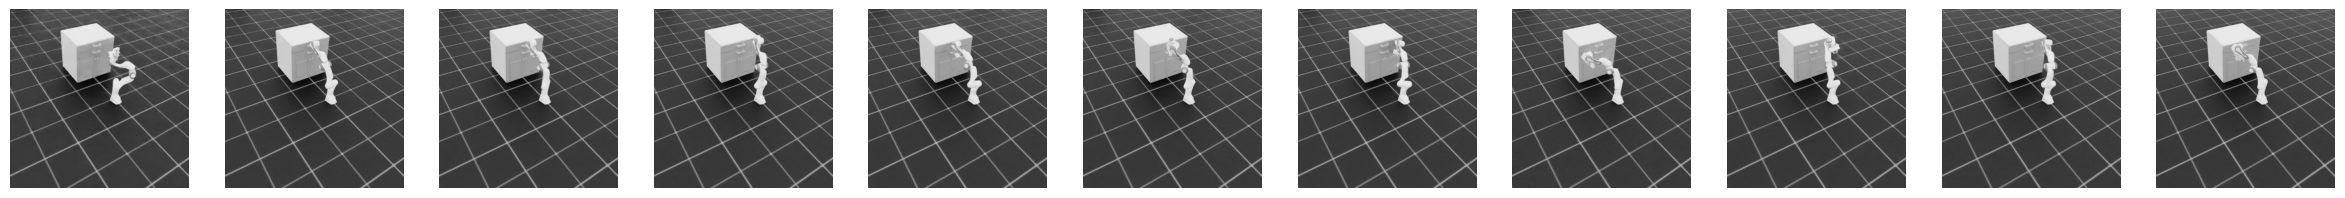

In [21]:
img_path = r"/home/levi/data/dev_images/"
files = os.listdir(img_path)
# sort the files by filename
files.sort()

# read each file, convert to base64 and put in an array
images = []
images_b64 = []
for file in files:
    if file.endswith(".png"):
        # store the images as a PIL image in the array
        image = Image.open(os.path.join(img_path, file))
        images.append(image)
        images_b64.append(encode_image(os.path.join(img_path, file)))

# plot the images in a single plot using matplotlib
fig, axs = plt.subplots(1, len(images), figsize=(30, 30))
for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")

In [9]:
messages=[
    {
    "role": "system",
    "content": """You are an image assessment tool that intreprets images and provides a real valued score indicating the degree that a robot has completed a specified task between 0 and 10 where 0 is equivalent to not started and 10 is completed. 
    The output will be in JSON format as an array of objects with a single key 'score' and a value between 0 and 10.""",
    },
    {
    "role": "user",
    "content": [
        {
        "type": "text",
        "text": "A robot arm is given a task to open the top drawer of a white cabinet. Provide scores for each of the following images considering the first image as a reference image with score 0. Include the reference image score along with the other images.",
        },          
        ],
    },
]

In [11]:
image_array = [
    {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/jpeg;base64,{images_b64[0]}",
        "detail": "auto",
        },
    }                
]
messages[1]['content'].extend(image_array)

In [12]:
image_array = [
    {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/jpeg;base64,{image_b64}",
        "detail": "auto",
        },
    }
for image_b64 in images_b64[1:]
]
messages[1]['content'].extend(image_array)

[{'content': 'You are an image assessment tool that intreprets images and '
             'provides a real valued score indicating the degree that a robot '
             'has completed a specified task between 0 and 10 where 0 is '
             'equivalent to not started and 10 is completed. \n'
             '    The output will be in JSON format as an array of objects '
             "with a single key 'score' and a value between 0 and 10.",
  'role': 'system'},
 {'content': [{'text': 'A robot arm is given a task to open the top drawer of '
                       'a white cabinet. Provide scores for each of the '
                       'following images considering the first image as a '
                       'reference image with score 0. Include the reference '
                       'image score along with the other images.',
               'type': 'text'},
              {'image_url': {'detail': 'auto',
                             'url': ''},
               'type': 'image_url'},
  
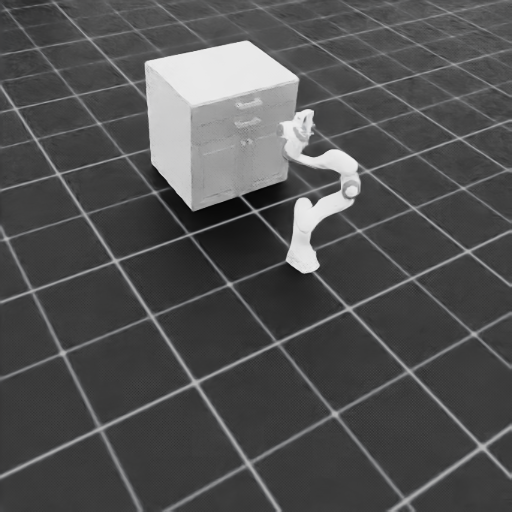
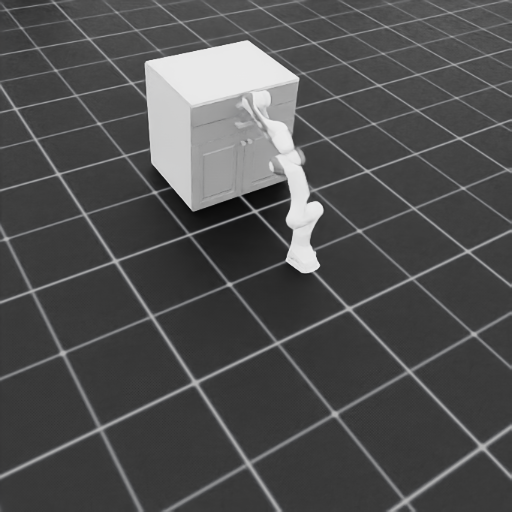
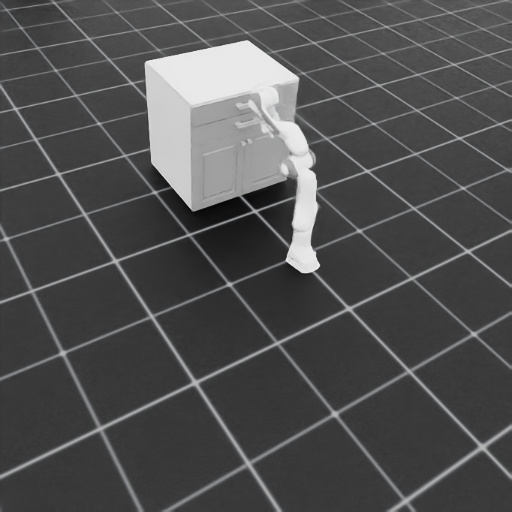
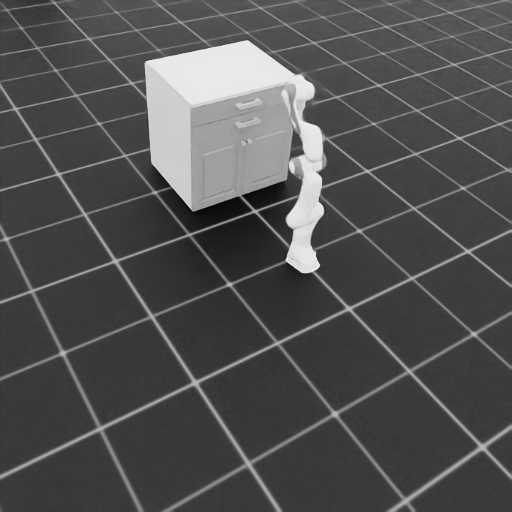
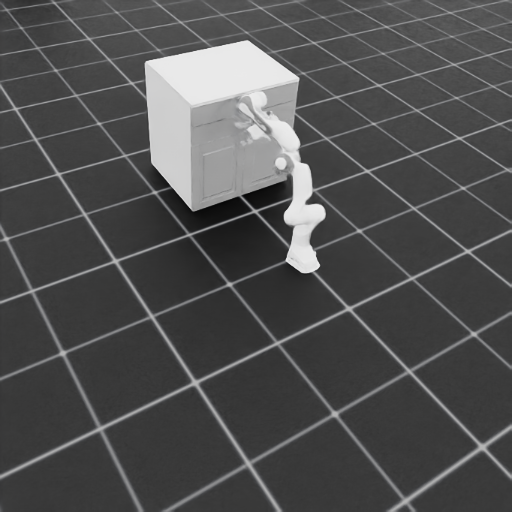
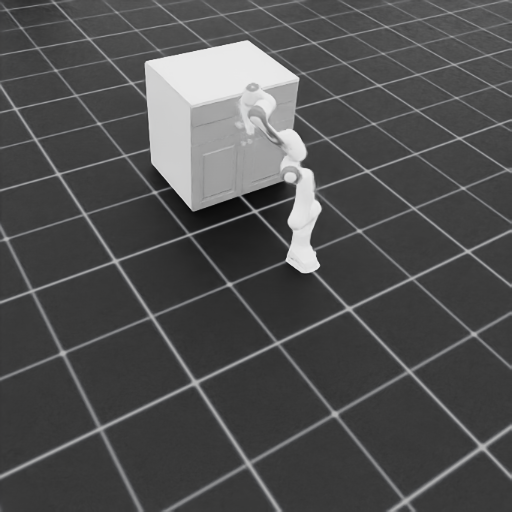
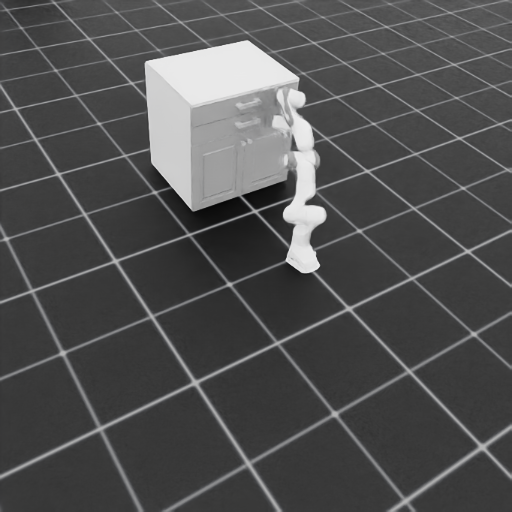
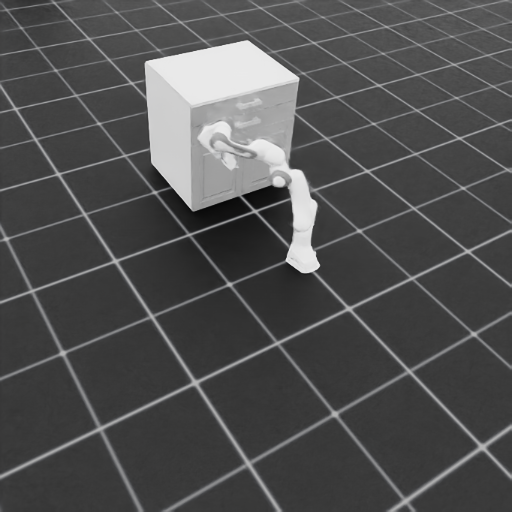
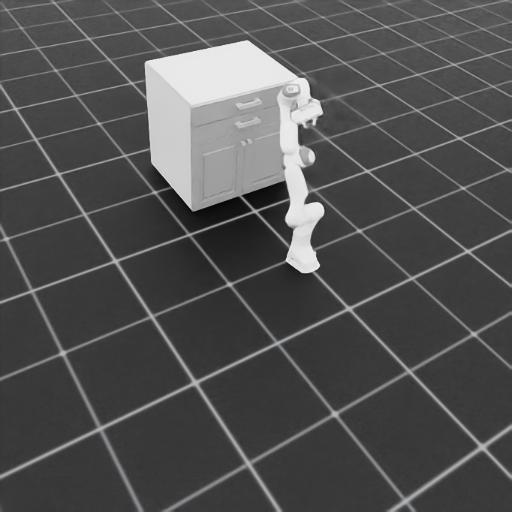
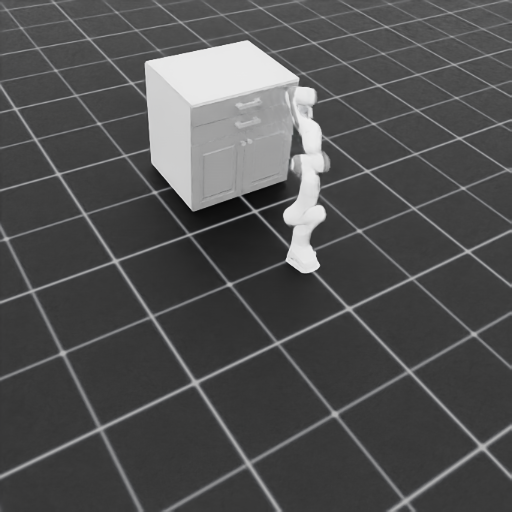
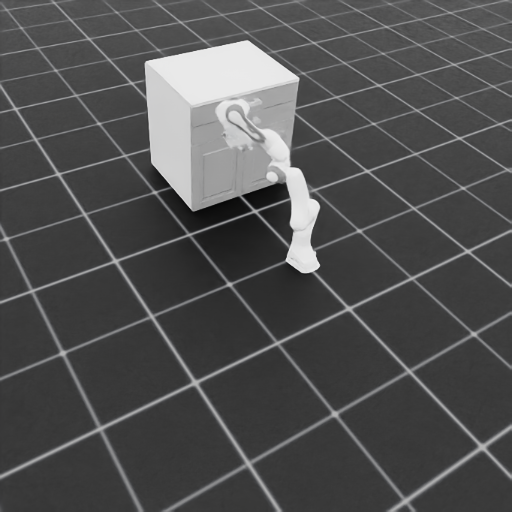

In [13]:
pp.pprint(messages)

In [2]:
api_key = os.environ.get("OPENAIKEY")
gpt_client = OpenAI(
    api_key=api_key
)

In [17]:
response = gpt_client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    response_format={"type": "json_object"},  # Provide the correct response format
    max_tokens=300,
)

In [18]:
pp.pprint(response)

ChatCompletion(id='chatcmpl-9yB41Nh3In7VfBRnfSLylycN3czB7', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "scores": [\n        {"score": 0},\n        {"score": 2},\n        {"score": 3},\n        {"score": 4},\n        {"score": 3},\n        {"score": 4},\n        {"score": 5},\n        {"score": 6},\n        {"score": 3},\n        {"score": 4},\n        {"score": 3}\n    ]\n}', role='assistant', function_call=None, tool_calls=None, refusal=None))], created=1724129237, model='gpt-4o-2024-05-13', object='chat.completion', service_tier=None, system_fingerprint='fp_c9aa9c0491', usage=CompletionUsage(completion_tokens=86, prompt_tokens=2944, total_tokens=3030))


In [19]:
reward_scores = response.choices[0].message.content
reward_array = json.loads(reward_scores)["scores"]
score_array = [score["score"] for score in reward_array]

In [20]:
pp.pprint(score_array)


[0, 2, 3, 4, 3, 4, 5, 6, 3, 4, 3]
